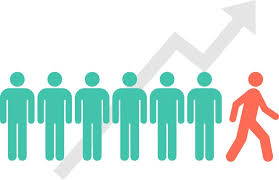

<h1>Telecom Customer Churn</h1>

Churn data for a fictional Telecommunications company that provides phone and internet services to 7,043 customers in California, and includes details about customer demographics, location, services, and current status.

<h1>What Does Churn Mean For Customer ? </h1>

<p>Customer churn, also called customer attrition, is the number of paying customers who fail to become repeat customers. In this context, churn is a quantifiable rate of change that occurs over a specified amount of time.</p>

# Importing Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Basic Explore Dataset

In [2]:
df_dict = pd.read_csv('telecom_data_dictionary.csv', encoding='latin-1')
print('Glimpse Dataset Dict:\n')
print('Top 5 data :\n')
df_dict.head()

Glimpse Dataset Dict:

Top 5 data :



,Table,Field,Description
0,Customer Churn,CustomerID,A unique ID that identifies each customer
1,Customer Churn,Gender,"The customers gender: Male, Female"
2,Customer Churn,Age,"The customers current age, in years, at the t..."
3,Customer Churn,Married,"Indicates if the customer is married: Yes, No"
4,Customer Churn,Number of Dependents,Indicates the number of dependents that live w...


In [3]:
df_churn = pd.read_csv('telecom_customer_churn.csv')
print('Tp 5 Glimpse Dataset of Cust Churn:\n')
df_churn.head()


Tp 5 Glimpse Dataset of Cust Churn:



,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
df_zipcode = pd.read_csv('telecom_zipcode_population.csv')
df_zipcode.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [5]:
print(f'Dataset have {df_churn.shape[0]} rows and {df_churn.shape[1]} columns\n')
print('Information of Dataset:\n')
df_churn.info()

Dataset have 7043 rows and 38 columns

Information of Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64

In [6]:
df_churn.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [7]:
table = pd.DataFrame({
    "No Unique" : df_churn.nunique(),
    "Missing Value": df_churn.isnull().sum(),
    'NaNN Value': df_churn.isna().sum(),
    'Duplicated' : df_churn.duplicated().sum(),
    'Dtype': df_churn.dtypes
})

table

,No Unique,Missing Value,NaNN Value,Duplicated,Dtype
Customer ID,7043,0,0,0,object
Gender,2,0,0,0,object
Age,62,0,0,0,int64
Married,2,0,0,0,object
Number of Dependents,10,0,0,0,int64
City,1106,0,0,0,object
Zip Code,1626,0,0,0,int64
Latitude,1626,0,0,0,float64
Longitude,1625,0,0,0,float64
Number of Referrals,12,0,0,0,int64


**Conclusion** :
1. Dataset have 8946 rows and 38 columns  
2. There are missing value = NaNN Value. Treatment each data NaNN will be process
3. No Duplicated data

# Formatting and Cleaning Dataset

In [8]:
df_copy = df_churn.copy()

In [9]:
# Delete Unused Columns
df_copy.drop(columns = ['Zip Code', 'Latitude', 'Longitude', 'City'],axis =1, inplace = True)

In [10]:
# Library for visualization of missing value
import missingno as msno

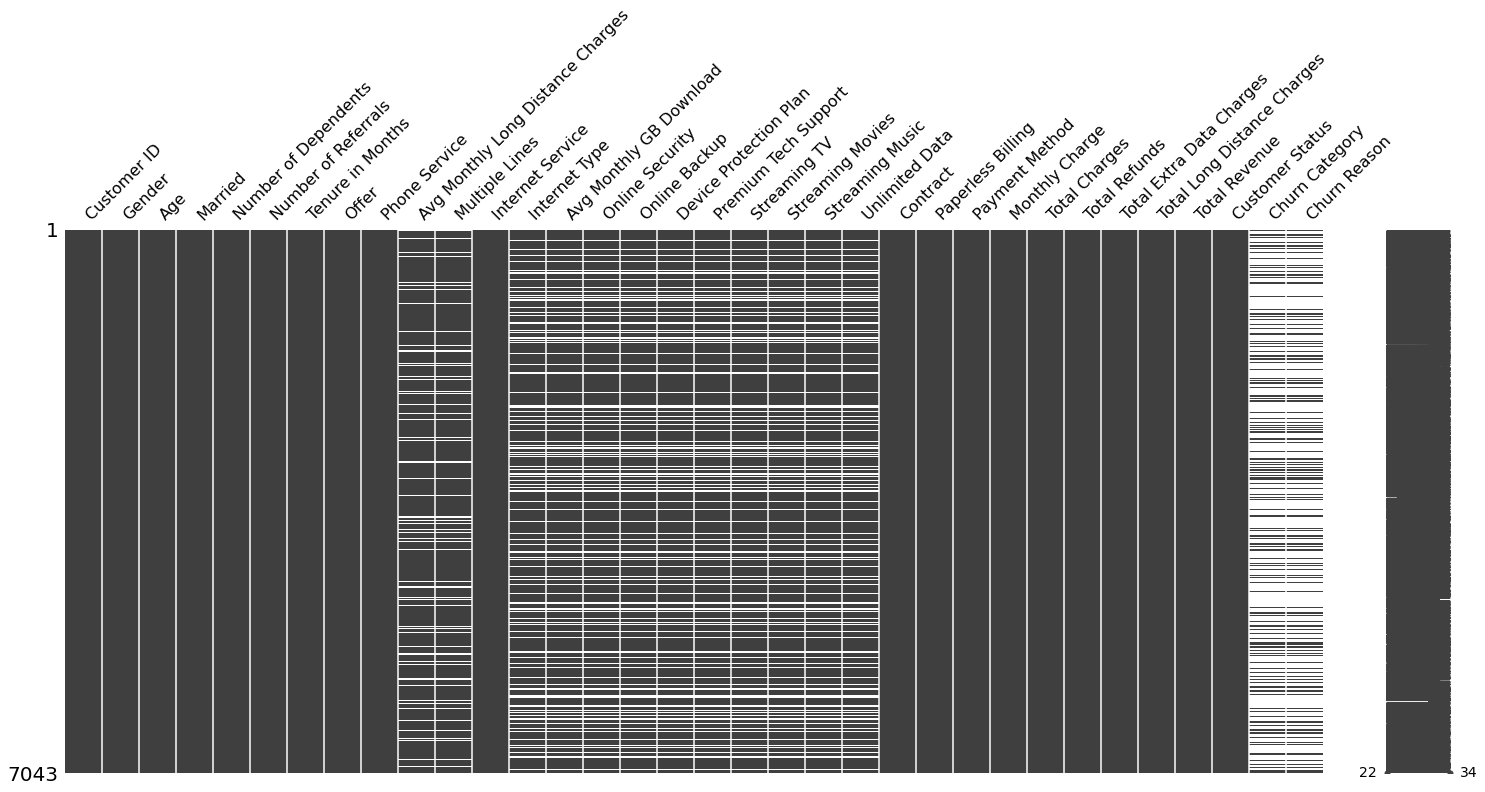

In [11]:
msno.matrix(df_copy)

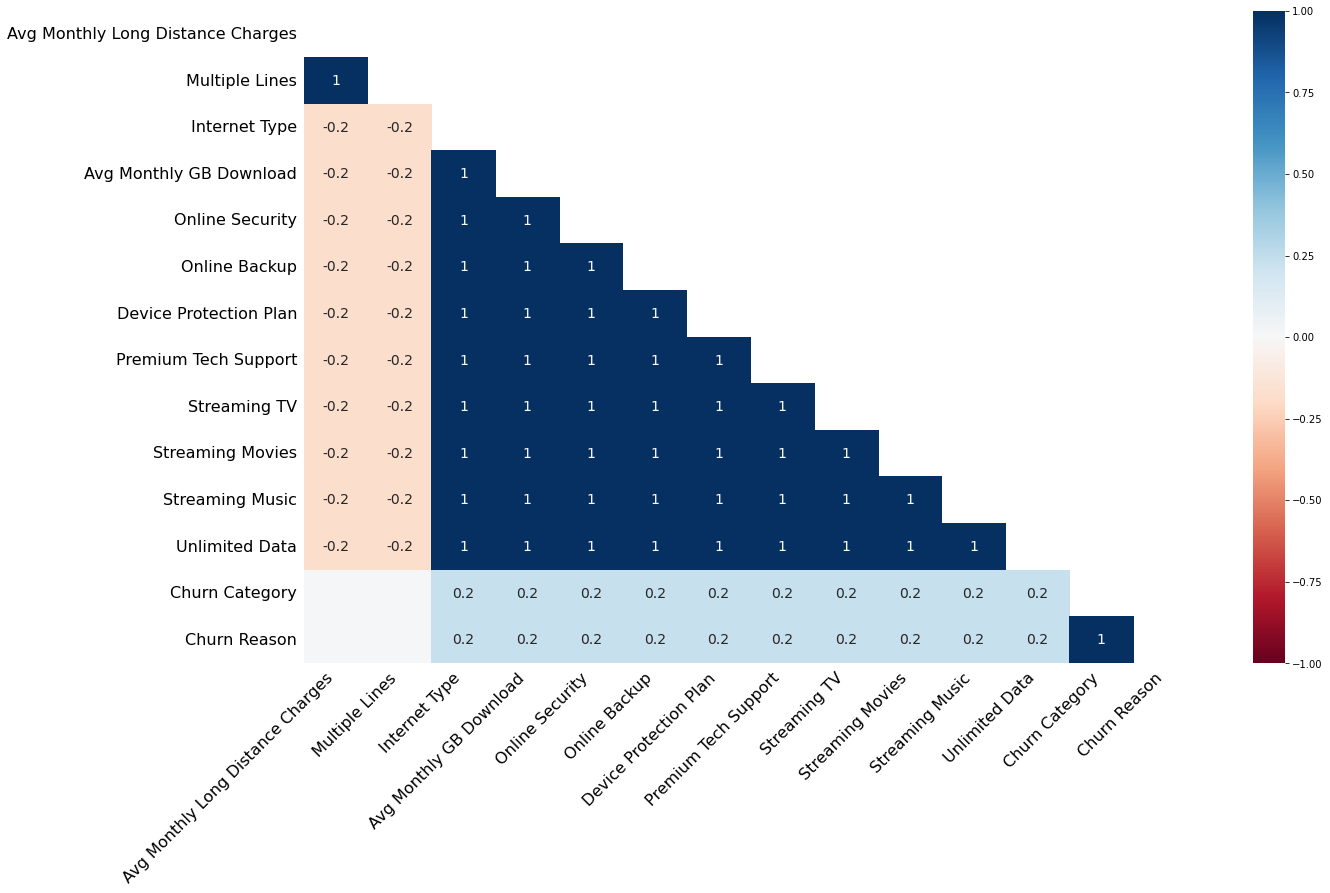

In [12]:
msno.heatmap(df_copy)

In [13]:
# Using KNNeighbors for imputing missing value
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_copy['Avg Monthly GB Download'] = knn_imputer.fit_transform(df_copy[['Avg Monthly GB Download']])
df_copy['Avg Monthly Long Distance Charges'] = knn_imputer.fit_transform(df_copy[['Avg Monthly Long Distance Charges']])

In [14]:
# SimpleImputer for categorical using strategy = most_frequent

from sklearn.impute import SimpleImputer

#setting strategy 'most_freq' to impute by the mode
const_imputer = SimpleImputer(strategy='most_frequent') 
df_copy['Churn Reason'] = const_imputer.fit_transform(df_copy[['Churn Reason']])
df_copy['Churn Category'] = const_imputer.fit_transform(df_copy[['Churn Category']])
df_copy['Unlimited Data'] = const_imputer.fit_transform(df_copy[['Unlimited Data']])
df_copy['Streaming Music'] = const_imputer.fit_transform(df_copy[['Streaming Music']])
df_copy['Streaming Movies'] = const_imputer.fit_transform(df_copy[['Streaming Movies']])
df_copy['Streaming TV'] = const_imputer.fit_transform(df_copy[['Streaming TV']])
df_copy['Premium Tech Support'] = const_imputer.fit_transform(df_copy[['Premium Tech Support']])
df_copy['Device Protection Plan'] = const_imputer.fit_transform(df_copy[['Device Protection Plan']])
df_copy['Online Backup'] = const_imputer.fit_transform(df_copy[['Online Backup']])
df_copy['Online Security'] = const_imputer.fit_transform(df_copy[['Online Security']])
df_copy['Internet Type'] = const_imputer.fit_transform(df_copy[['Internet Type']])
df_copy['Multiple Lines'] = const_imputer.fit_transform(df_copy[['Multiple Lines']])



In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [16]:
df_copy.to_csv('data_clean.csv', index=False)

Dataset was clean. Next step is visualization dataset to find insight data

# Visualization

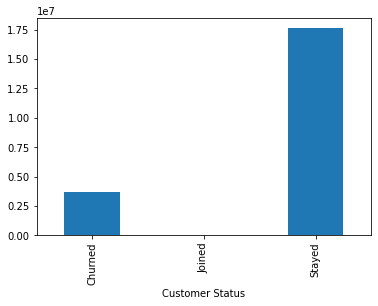

In [17]:
# Revenue for each Cust Status
df_revenue = df_copy.groupby(df_copy['Customer Status'])['Total Revenue'].sum()
df_revenue.plot(kind = 'bar', )

In [18]:
df_copy.drop(columns=['Customer ID'], axis = 1, inplace = True)

In [19]:
cat = df_copy.select_dtypes(include = "O")

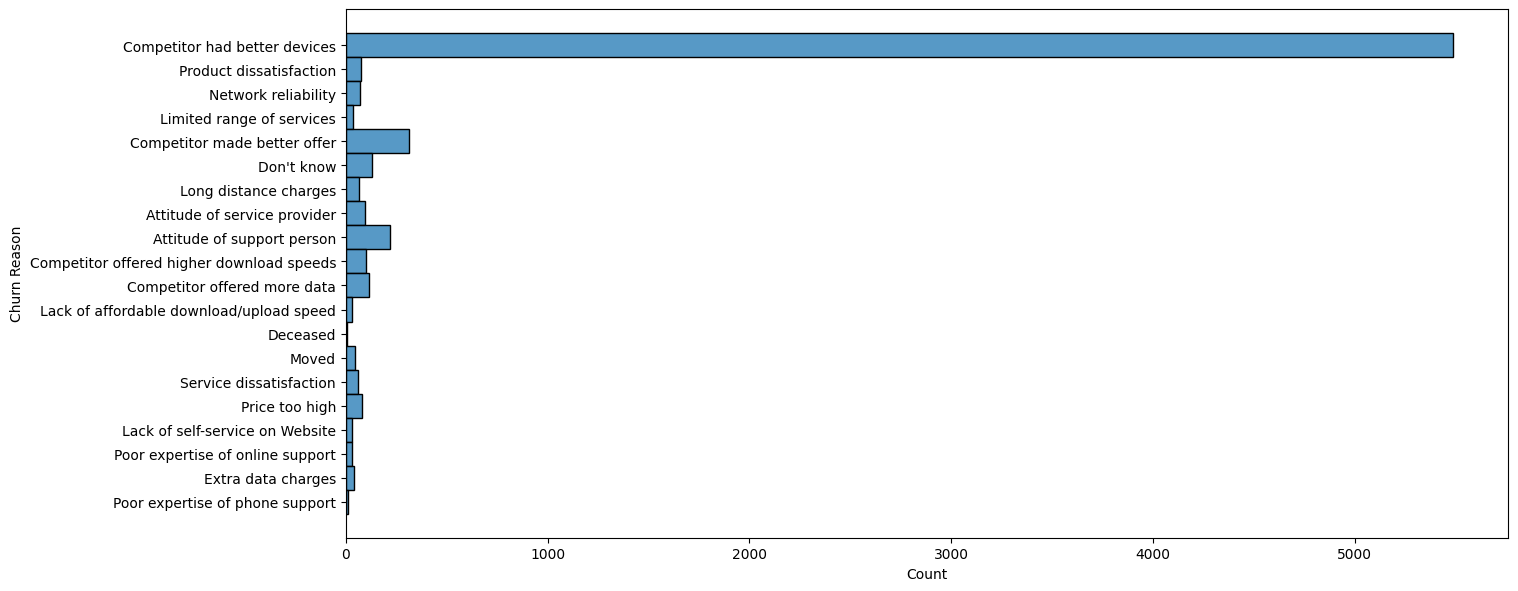

In [20]:
# create figure and axes
fig, ax = plt.subplots(figsize=(15, 7), dpi=100)
# ax.tick_params(axis='y', rotation=45)
# plot to the existing fig, by using ax=ax
p = sns.histplot(data=df_copy, y='Churn Reason', ax=ax)

<h2> Insight : </h2> 
<p>the cause of the most customer churn is Competito had better devices </p>

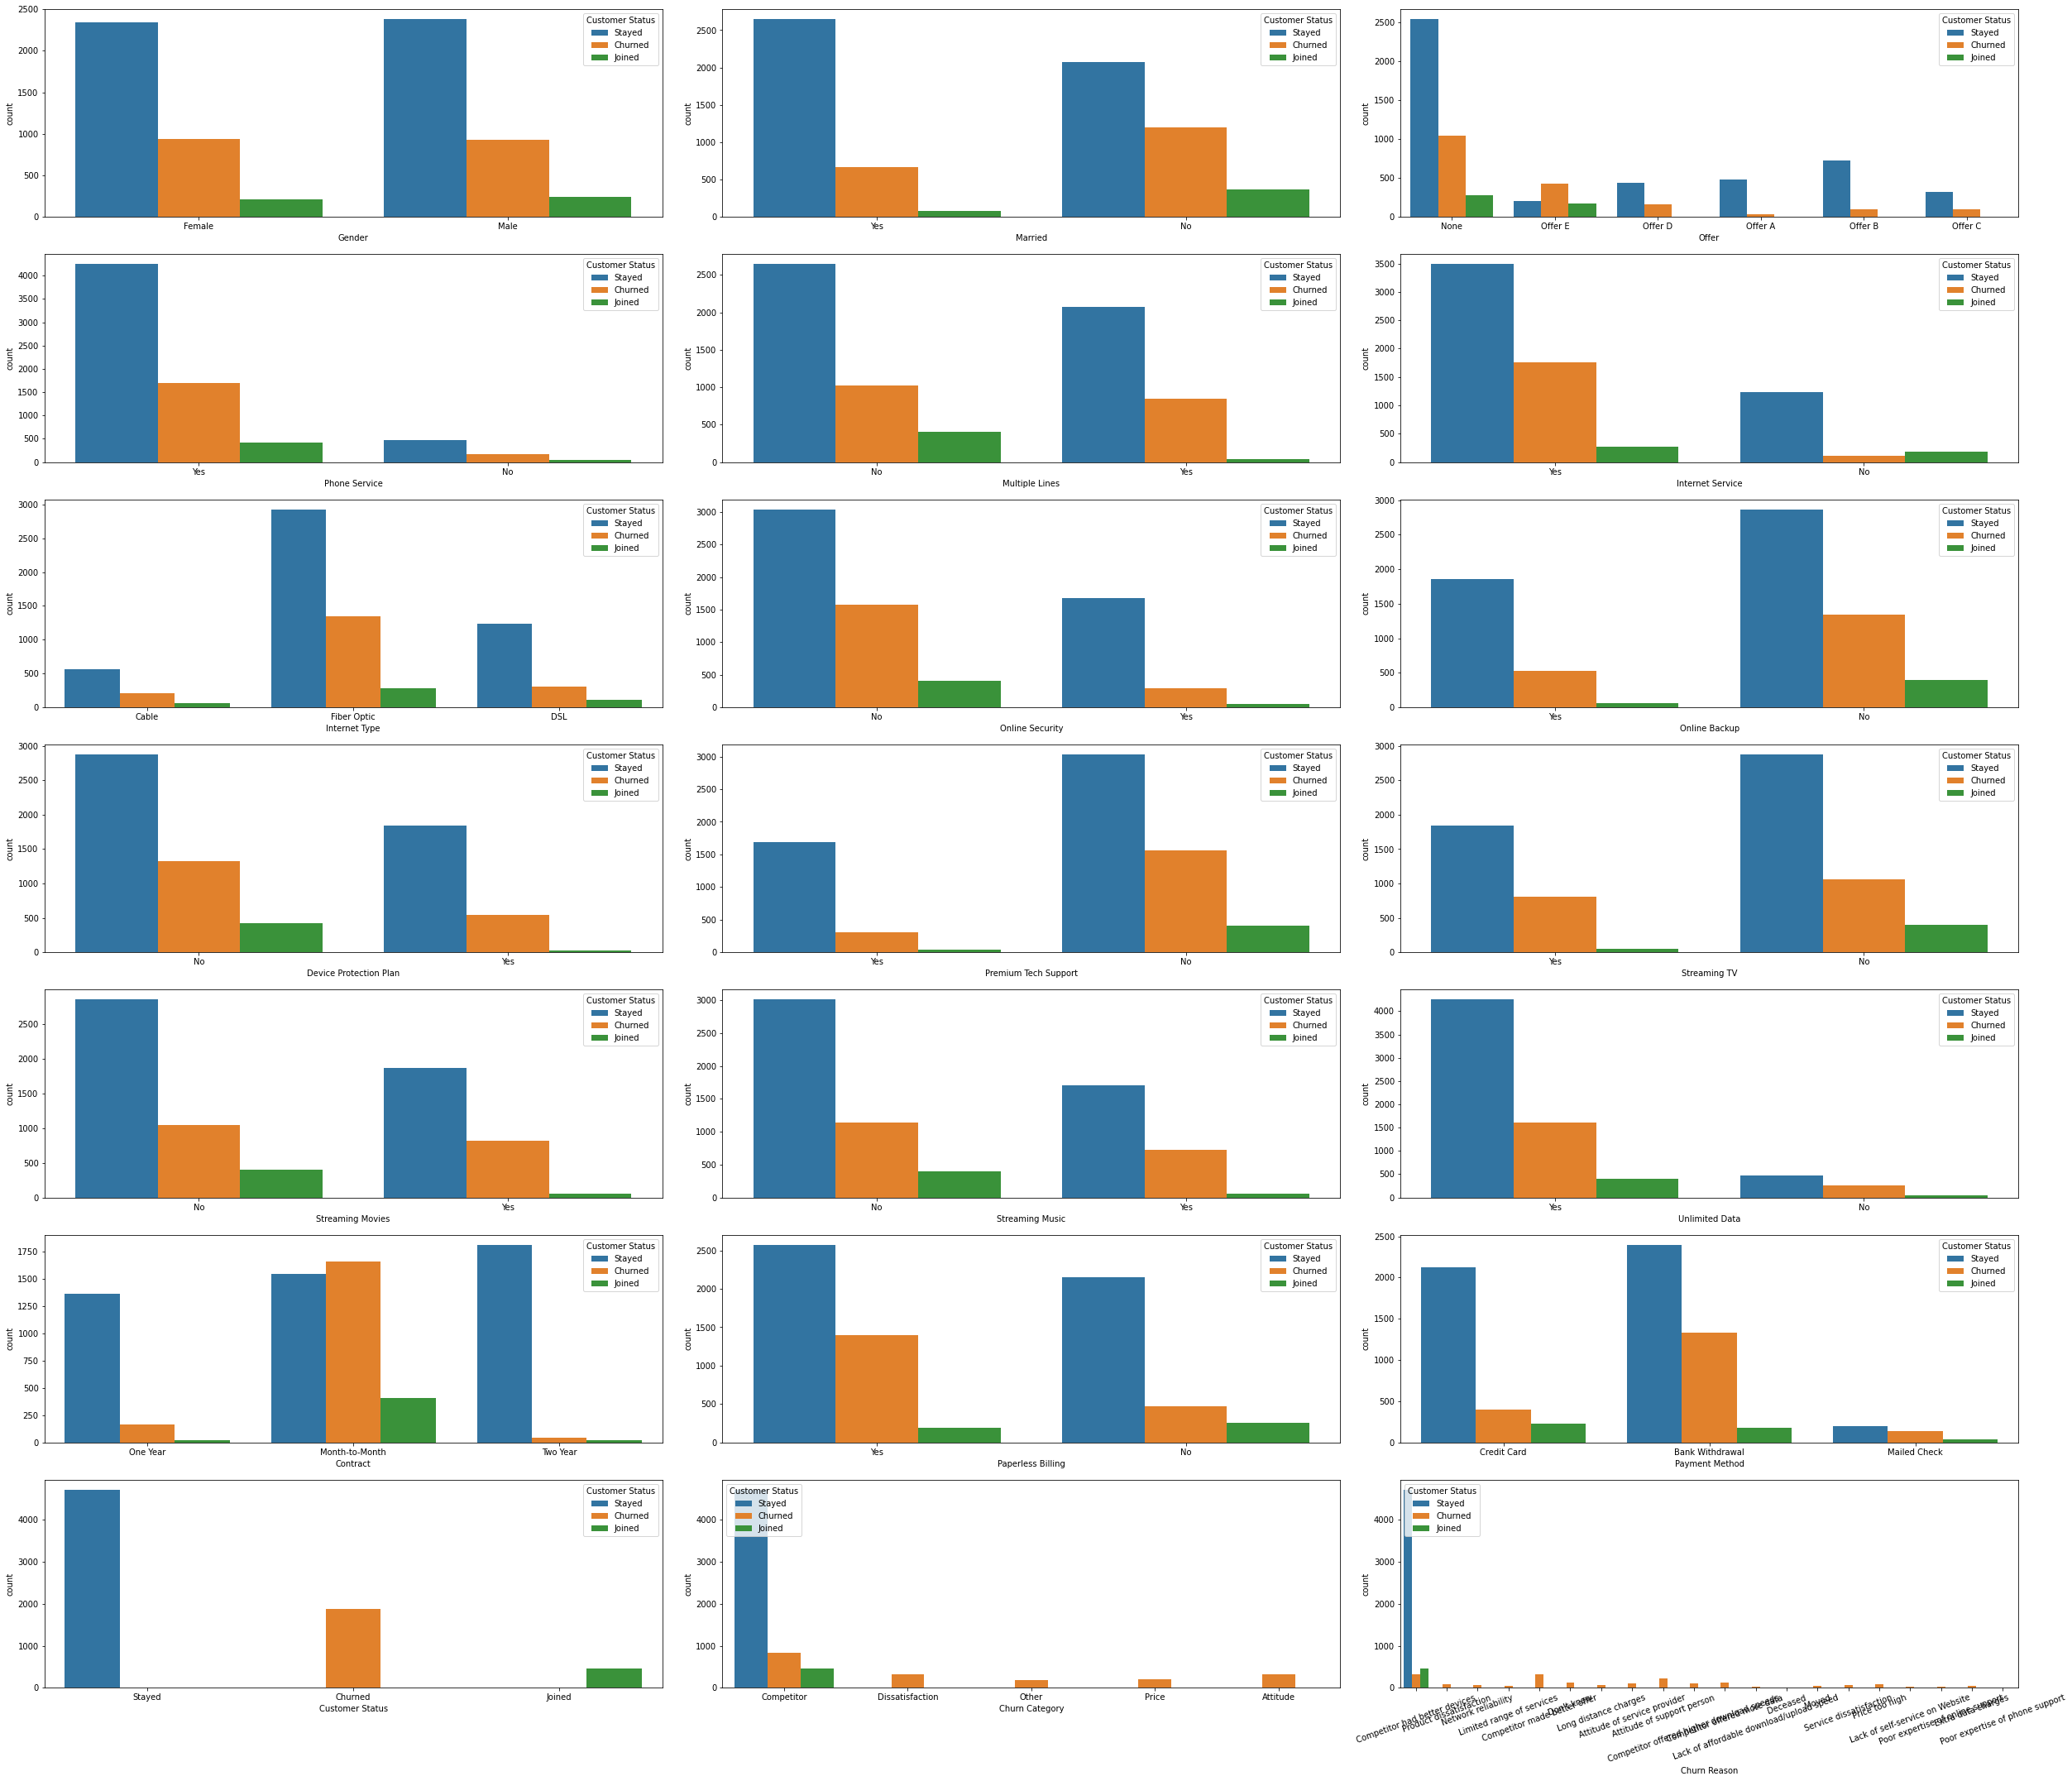

In [21]:
# visualization to display statements from churn, stay and join from categorical data

plt.figure(figsize=(35,45))
for i, col in enumerate(cat.columns):
    axes = plt.subplot(11,3, i + 1)
    sns.countplot(x=cat[col], hue = df_copy['Customer Status'])
plt.tight_layout()
plt.xticks(rotation = 20, fontsize = 10)
plt.show()

In [22]:
num = df_copy.select_dtypes(exclude = 'O')

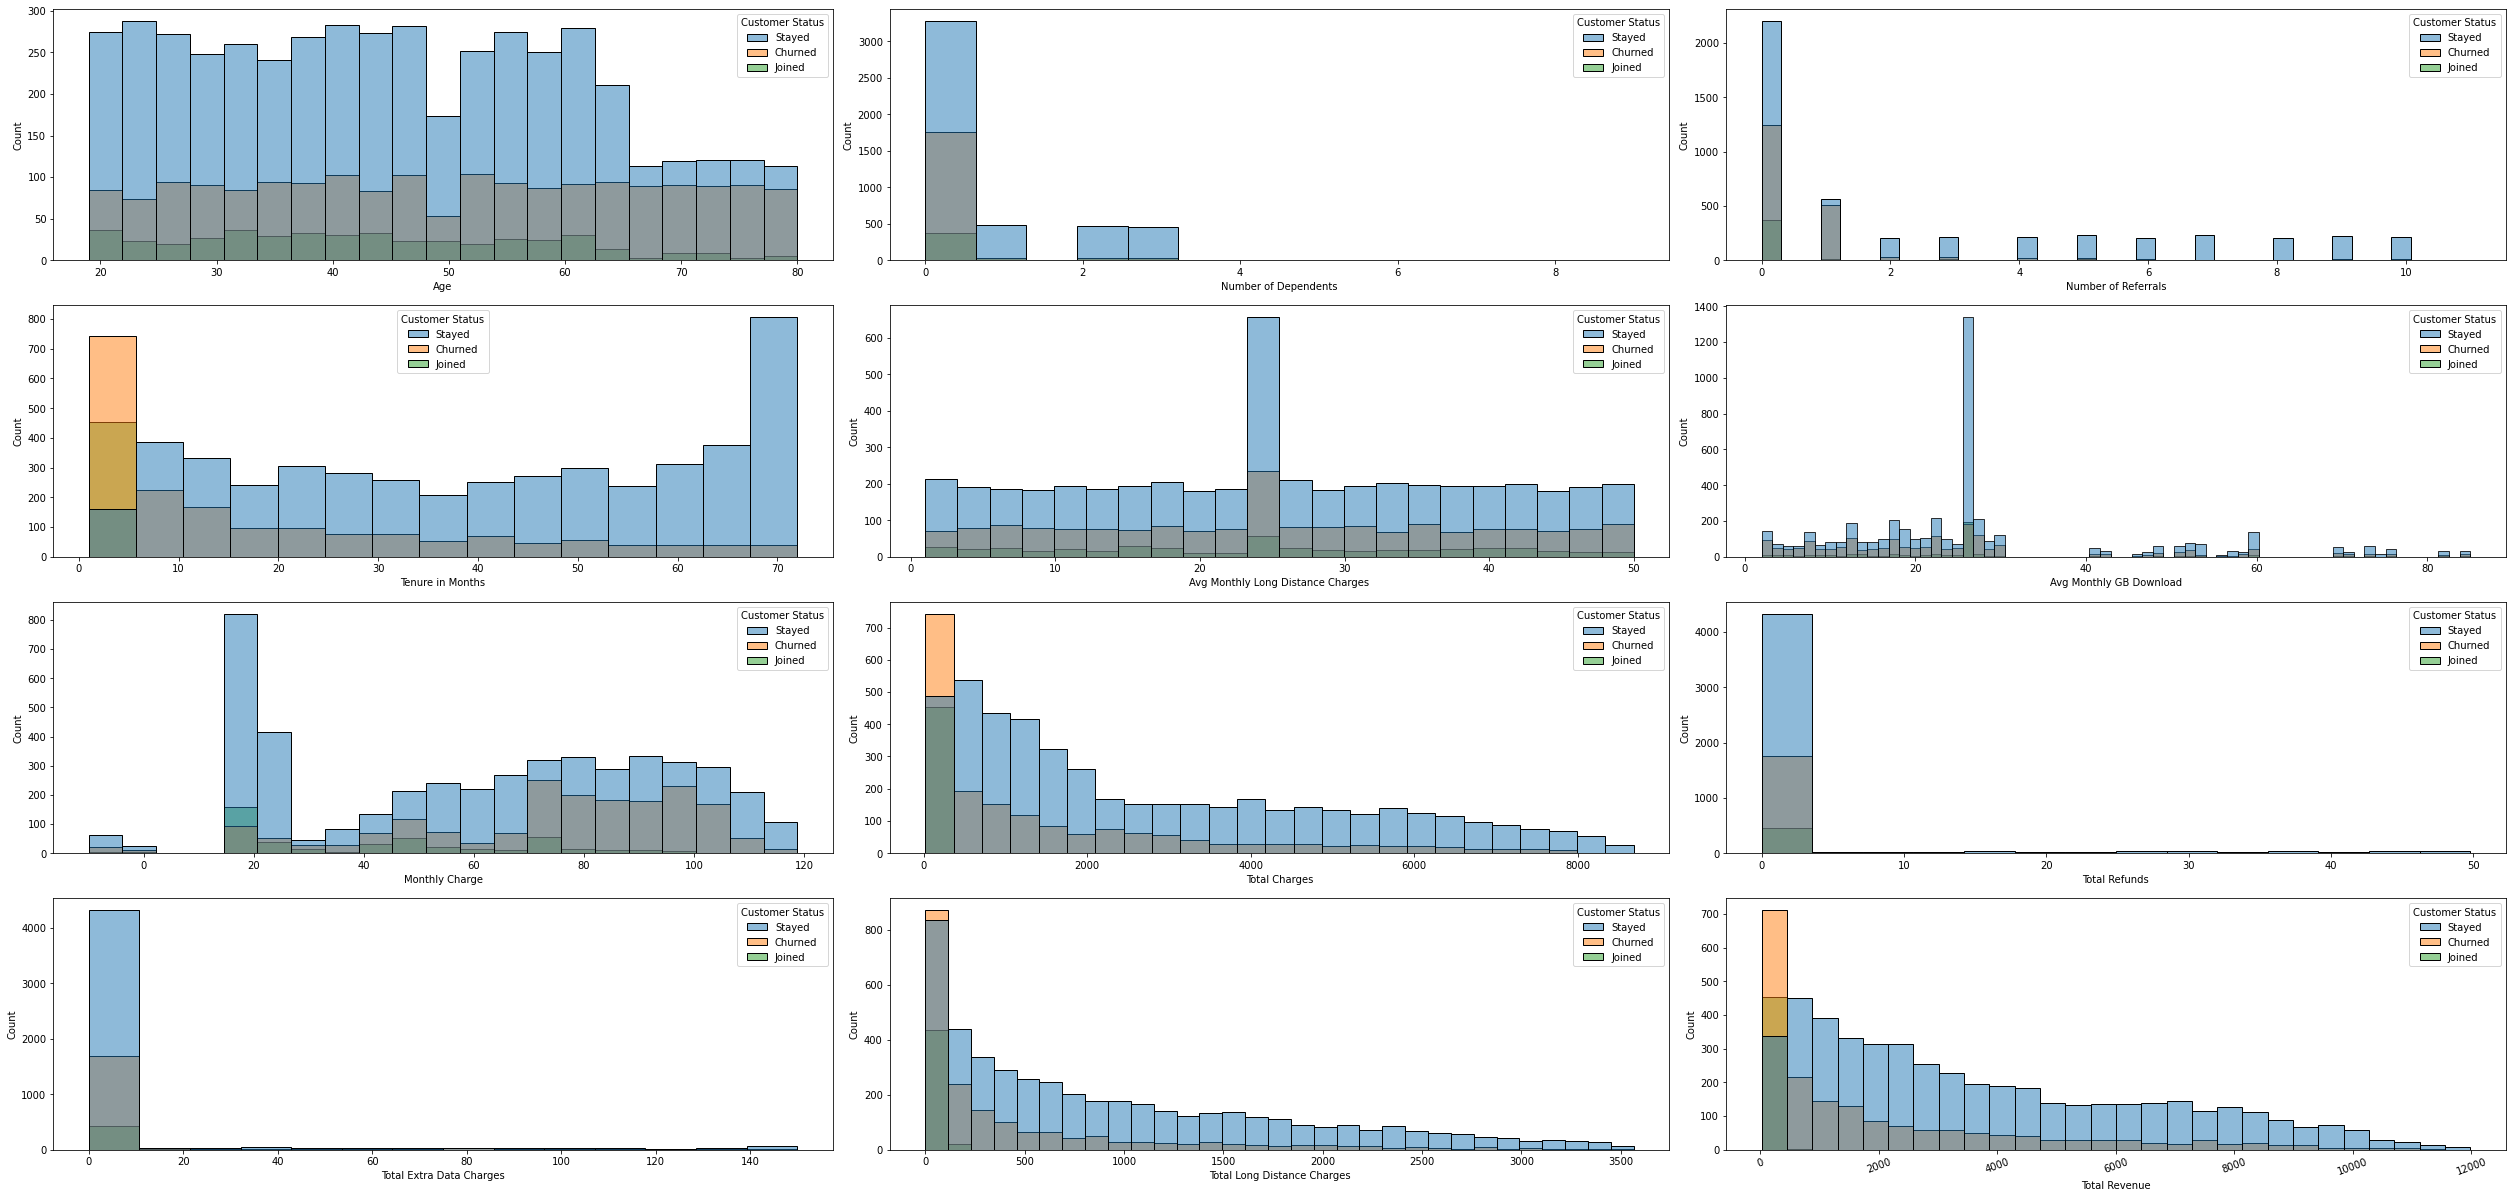

In [23]:
plt.figure(figsize=(35,45))
for i, col in enumerate(num.columns):
    axes = plt.subplot(11,3, i + 1)
    sns.histplot(x=num[col], hue = df_copy['Customer Status'])
plt.tight_layout()
plt.xticks(rotation = 20, fontsize = 10)
plt.show()

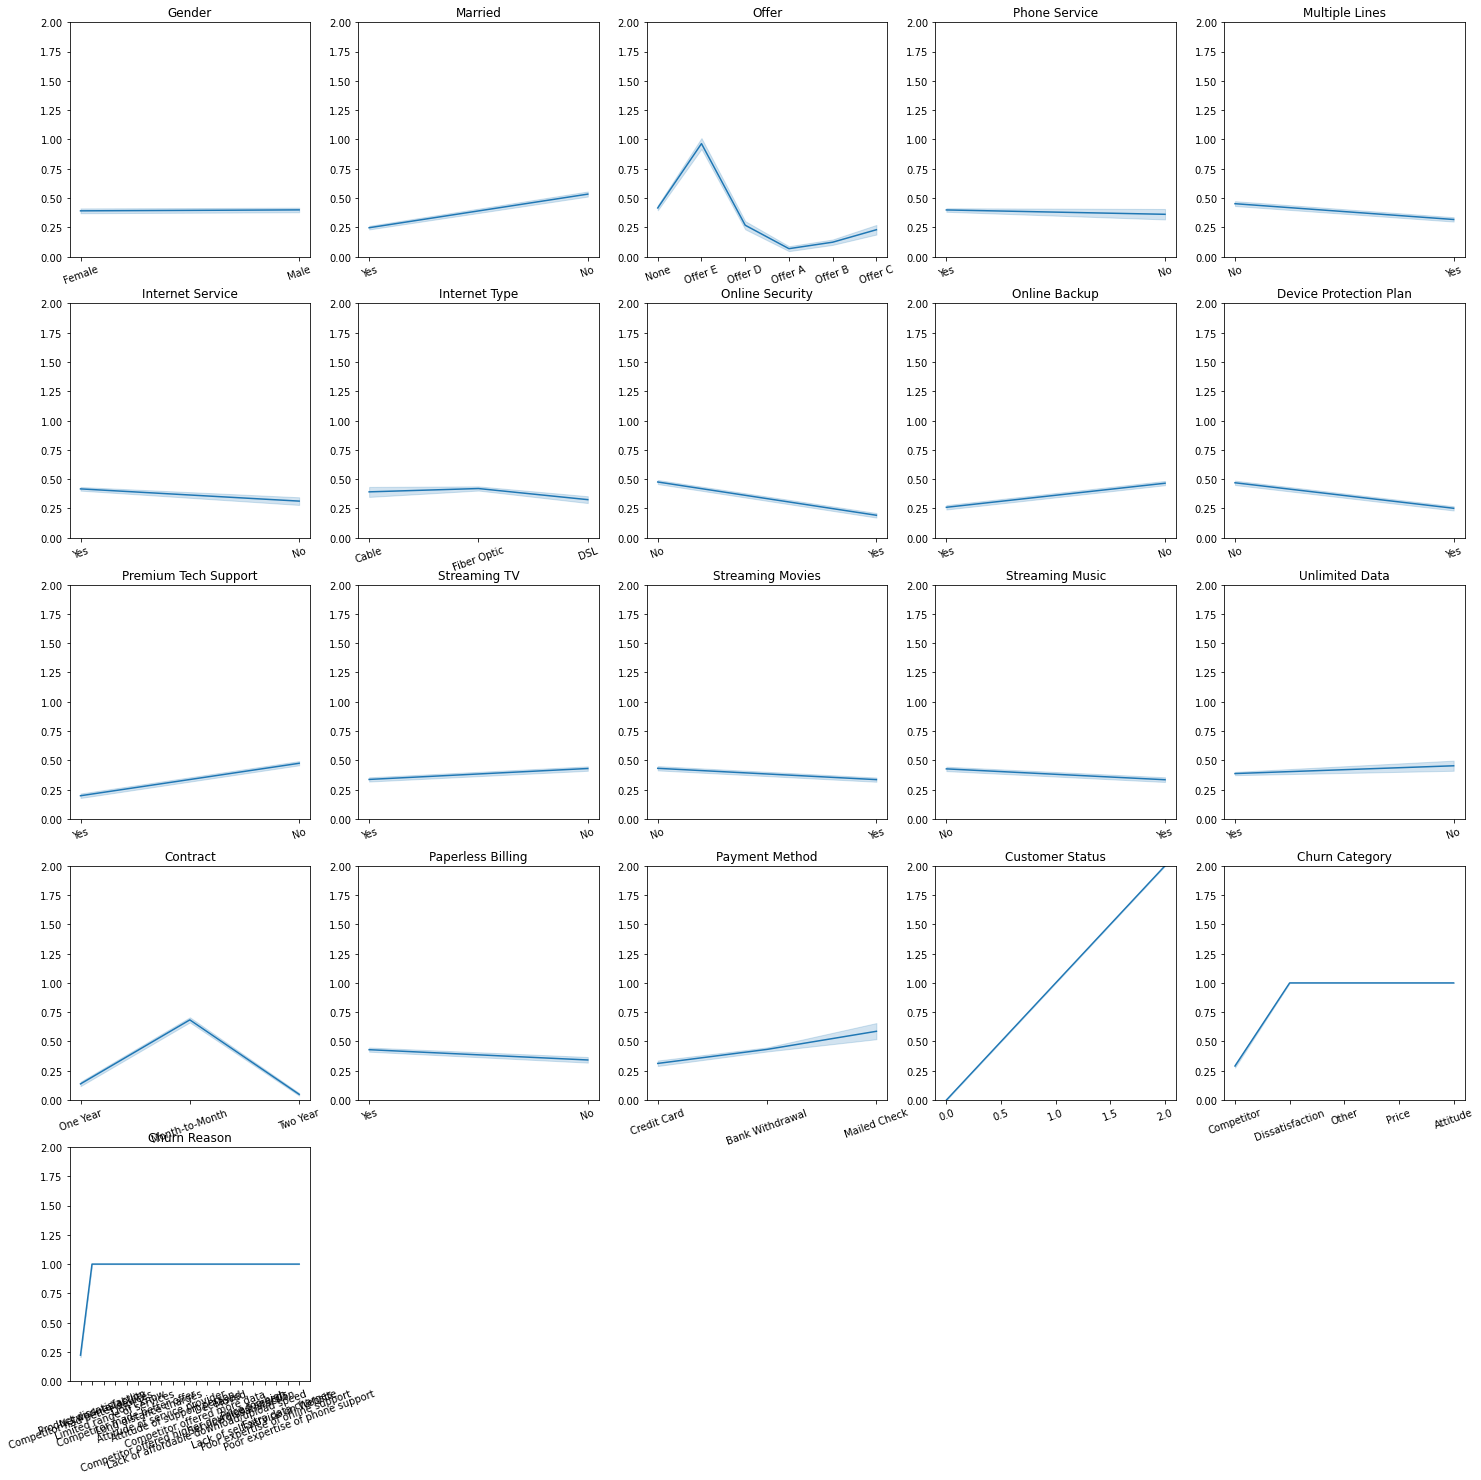

In [24]:
# Visualization with line plot

#transform to index 0 - 2 for customer status
df_copy.loc[df_copy['Customer Status'] == 'Stayed', 'Customer Status'] = 0
df_copy.loc[df_copy['Customer Status'] == 'Churned', 'Customer Status'] = 1
df_copy.loc[df_copy['Customer Status'] == 'Joined', 'Customer Status'] = 2
i = 1
plt.figure(figsize=(25,25))
for c in cat.columns:
    ax = plt.subplot(5,5, i)
    ax = sns.lineplot(data = df_copy, x = df_copy[c], y= df_copy['Customer Status'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    plt.ylim(0, 2)
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1




**CONCLUSION** :

From data visualization we can conclude that the causes of churn :

1. Type of offer E is the biggest contributor to customers leaving the company, in contrast to offers A and B which make customers stayed

2. People who do not use services such as Internet Service, Multiple Lines, Online Back up more chrun than stayed

3. The most visible thing is that the monthly contract factor is the main cause of people churning

---
## Recommendations to the company

1. **Concentrate marketing efforts to Offer A or B**  
2. **Converting current month-to-month users to long term contract** 
3. **Attractively introduce the additional internet and streaming services to internet users.**  
---

## Next Step
1. **geospatial analyze for location or city that have high risk cust churn**
2. **Apply machine learning to predict the customers churn**




# PreProcessing 

In [25]:
import pandas as pd
df = pd.read_csv('data_clean.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,2,9,None,Yes,42.39,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Competitor,Competitor had better devices
1,0003-MKNFE,Male,46,No,0,0,9,None,Yes,10.69,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Competitor,Competitor had better devices
2,0004-TLHLJ,Male,50,No,0,0,4,Offer E,Yes,33.65,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,1,13,Offer D,Yes,27.82,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,3,3,None,Yes,7.38,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [27]:
df.drop(['Customer ID'], axis = 1 , inplace = True)

In [28]:
df.shape

(7043, 33)

In [29]:
df["Customer Status"].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [30]:
df = df.loc[df["Customer Status"] != 'Joined']

In [31]:
df.shape

(6589, 33)

In [32]:
df = df.rename(columns = {'Customer Status':'Customer_Status'})

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Customer_Status = le.fit_transform(df.Customer_Status)

In [34]:
num_col = list(df.describe().columns)
cat_col = list(set(df.columns).difference(num_col))

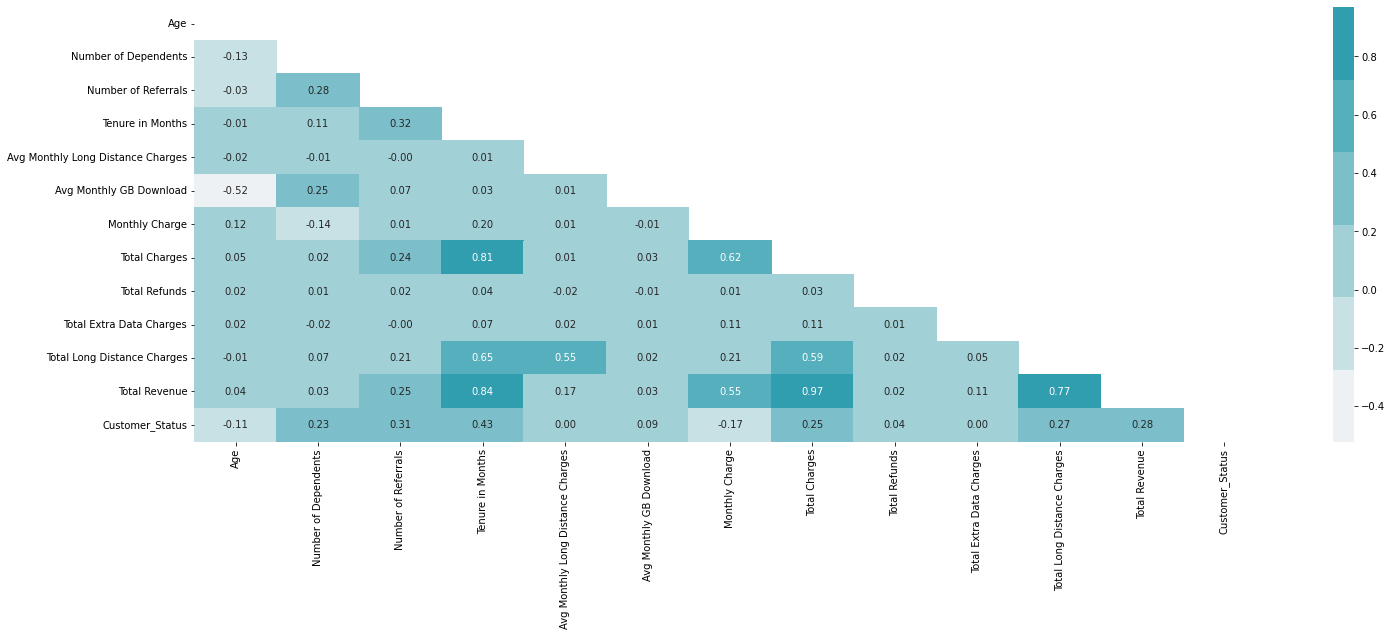

In [35]:
plt.figure(figsize=(24,8))

# Mask for the upper triangle
mask = np.zeros_like(df[num_col].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(10, 220, as_cmap=True)
cmap = sns.light_palette((210, 90, 60), input="husl")

# Heatmap with mask
sns.heatmap(df[num_col].corr(), mask=mask, cmap=cmap, annot=True, fmt=".2f");

In [36]:
cat_col

['Multiple Lines',
 'Streaming TV',
 'Internet Type',
 'Premium Tech Support',
 'Payment Method',
 'Phone Service',
 'Internet Service',
 'Streaming Music',
 'Contract',
 'Churn Category',
 'Offer',
 'Churn Reason',
 'Unlimited Data',
 'Paperless Billing',
 'Device Protection Plan',
 'Streaming Movies',
 'Online Backup',
 'Gender',
 'Online Security',
 'Married']

In [37]:
num_col

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Customer_Status']

In [38]:
num_col.remove('Customer_Status')

In [39]:
df_cat = pd.get_dummies(df[cat_col])
df_cat.head()

,Multiple Lines_No,Multiple Lines_Yes,Streaming TV_No,Streaming TV_Yes,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Premium Tech Support_No,Premium Tech Support_Yes,Payment Method_Bank Withdrawal,...,Streaming Movies_No,Streaming Movies_Yes,Online Backup_No,Online Backup_Yes,Gender_Female,Gender_Male,Online Security_No,Online Security_Yes,Married_No,Married_Yes
0,1,0,0,1,1,0,0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
1,0,1,1,0,1,0,0,1,0,0,...,0,1,1,0,0,1,1,0,1,0
2,1,0,1,0,0,0,1,1,0,1,...,1,0,1,0,0,1,1,0,1,0
3,1,0,0,1,0,0,1,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,1,0,0,1,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1


In [40]:
X = pd.concat([df[num_col], df_cat], axis=1)
X.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Streaming Movies_No,Streaming Movies_Yes,Online Backup_No,Online Backup_Yes,Gender_Female,Gender_Male,Online Security_No,Online Security_Yes,Married_No,Married_Yes
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,...,1,0,0,1,1,0,1,0,0,1
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,...,0,1,1,0,0,1,1,0,1,0
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,...,1,0,1,0,0,1,1,0,1,0
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,...,0,1,0,1,0,1,1,0,0,1
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,...,1,0,1,0,1,0,1,0,0,1


In [41]:
y = df['Customer_Status']
y.value_counts()

1    4720
0    1869
Name: Customer_Status, dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

# Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1497
           1       1.00      1.00      1.00      3774

    accuracy                           1.00      5271
   macro avg       1.00      1.00      1.00      5271
weighted avg       1.00      1.00      1.00      5271


Confusion Matrix: 
 [[1497    0]
 [   0 3774]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9530
Accuracy SD: 		 0.0070
Test Result:

accuracy score: 0.9492

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       372
           1       0.97      0.96      0.96       946

    accuracy                           0.95      1318
   macro avg       0.93      0.94      0.94      1318
weighted avg       0.95      0.95      0.95      1318


Confusion Matrix: 
 [[344  28]
 [ 39 907]]

ROC AUC: 0.9418



In [48]:
y_predicted = clf.predict(X_test)
y_predicted[:5]

array([1, 0, 1, 1, 0])

In [49]:
y_test[:5]

6490    1
4180    0
277     1
3710    1
787     0
Name: Customer_Status, dtype: int64

# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print('')
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1497
           1       1.00      1.00      1.00      3774

    accuracy                           1.00      5271
   macro avg       1.00      1.00      1.00      5271
weighted avg       1.00      1.00      1.00      5271


Confusion Matrix: 
 [[1497    0]
 [   0 3774]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9689
Accuracy SD: 		 0.0033

Test Result:

accuracy score: 0.9681

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       372
           1       0.96      1.00      0.98       946

    accuracy                           0.97      1318
   macro avg       0.97      0.95      0.96      1318
weighted avg       0.97      0.97      0.97      1318


Confusion Matrix: 
 [[334  38]
 [  4 942]]

ROC AUC: 0.9468



In [52]:
y_predicted = clf.predict(X_test)
y_predicted[:5]

array([1, 0, 1, 1, 0])

In [53]:
y_test.head()

6490    1
4180    0
277     1
3710    1
787     0
Name: Customer_Status, dtype: int64

# SVM

In [54]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma="scale")
clf.fit(X_train, y_train)
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9524

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91      1497
           1       0.94      1.00      0.97      3774

    accuracy                           0.95      5271
   macro avg       0.97      0.92      0.94      5271
weighted avg       0.96      0.95      0.95      5271


Confusion Matrix: 
 [[1246  251]
 [   0 3774]]

ROC AUC: 0.9162

Average Accuracy: 	 0.9524
Accuracy SD: 		 0.0053
Test Result:

accuracy score: 0.9530

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       372
           1       0.94      1.00      0.97       946

    accuracy                           0.95      1318
   macro avg       0.97      0.92      0.94      1318
weighted avg       0.96      0.95      0.95      1318


Confusion Matrix: 
 [[310  62]
 [  0 946]]

ROC AUC: 0.9167



# KNNeighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
print_score(knn, X_train, X_test, y_train, y_test, train=True)
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9315

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.79      0.87      1497
           1       0.92      0.99      0.95      3774

    accuracy                           0.93      5271
   macro avg       0.94      0.89      0.91      5271
weighted avg       0.93      0.93      0.93      5271


Confusion Matrix: 
 [[1184  313]
 [  48 3726]]

ROC AUC: 0.8891

Average Accuracy: 	 0.9042
Accuracy SD: 		 0.0079
Test Result:

accuracy score: 0.9059

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81       372
           1       0.90      0.98      0.94       946

    accuracy                           0.91      1318
   macro avg       0.91      0.85      0.88      1318
weighted avg       0.91      0.91      0.90      1318


Confusion Matrix: 
 [[270 102]
 [ 22 924]]

ROC AUC: 0.8513



# Grid Search

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [60]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              params, 
                              n_jobs=-1,
                              verbose=1,
                              cv=10)

In [61]:
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [62]:
grid_search_cv.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [63]:
print_score(grid_search_cv, X_train, X_test, y_train, y_test, train=True)
print_score(grid_search_cv, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9304

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.80      0.87      1497
           1       0.93      0.98      0.95      3774

    accuracy                           0.93      5271
   macro avg       0.94      0.89      0.91      5271
weighted avg       0.93      0.93      0.93      5271


Confusion Matrix: 
 [[1201  296]
 [  71 3703]]

ROC AUC: 0.8917

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candida

In [64]:
grid_search_cv.best_params_

{'n_neighbors': 10}

In [65]:
grid_search_cv.cv_results_['mean_test_score']

array([0.88503285, 0.88009962, 0.89831019, 0.90817449, 0.90419039,
       0.91177836, 0.90608684, 0.91253845, 0.90779534, 0.91386745])

In [66]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.00425   , 0.00415347, 0.00434976, 0.00385411, 0.00386775,
        0.00456076, 0.00446024, 0.0089582 , 0.00637586, 0.00843604]),
 'std_fit_time': array([0.00089245, 0.000395  , 0.00060049, 0.00043251, 0.00021462,
        0.00185038, 0.00135593, 0.0048065 , 0.00333166, 0.00589348]),
 'mean_score_time': array([0.08529193, 0.08782194, 0.09813018, 0.11207087, 0.11692758,
        0.11800106, 0.12446551, 0.20708206, 0.17935469, 0.31609786]),
 'std_score_time': array([0.00633976, 0.00327478, 0.00484854, 0.00614458, 0.0052084 ,
        0.00879834, 0.03327681, 0.04673921, 0.06535903, 0.07806705]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
